## Importe de las librerias que vamos a usar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from langdetect import detect
from nltk.tokenize import word_tokenize
import goslate 
from textblob import TextBlob
from googletrans import Translator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbarambi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip uninstall googletrans -y
!pip install googletrans==4.0.0rc1
import googletrans
print(googletrans.__version__)

Found existing installation: googletrans 4.0.0rc1
Uninstalling googletrans-4.0.0rc1:
  Successfully uninstalled googletrans-4.0.0rc1
Processing c:\users\rbarambi\appdata\local\pip\cache\wheels\a9\25\af\715361fa79594524c89c75d293def652045f3fdce6ca398712\googletrans-4.0.0rc1-py3-none-any.whl



## Carga de datos y un vistazo rapido

In [3]:
path = r'C:\Users\rbarambi\Desktop\dataset_nuevo'

In [4]:
data_model = pd.read_csv(path + '\\' + 'listings.csv')

In [5]:
data_model.shape

(21495, 16)

In [6]:
data_model.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.149500e+04,2.149500e+04,21495.000000,21495.000000,21495.000000,21495.000000,21495.000000,17204.000000,21495.000000,21495.000000
mean,2.518892e+07,1.097103e+08,40.420524,-3.694321,130.507141,4.418051,37.810002,1.983457,11.515190,163.023075
std,1.159283e+07,9.680060e+07,0.022026,0.028064,361.336857,21.762683,65.628418,1.957922,32.179352,136.536769
min,6.369000e+03,5.154000e+03,40.332470,-3.863910,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.721031e+07,2.408833e+07,40.409510,-3.707485,40.000000,1.000000,1.000000,0.450000,1.000000,23.000000
50%,2.667219e+07,8.403382e+07,40.418820,-3.701230,65.000000,2.000000,9.000000,1.350000,2.000000,143.000000
75%,3.506043e+07,1.877958e+08,40.428935,-3.688990,101.000000,3.000000,45.000000,3.000000,7.000000,312.000000
max,4.145256e+07,3.261182e+08,40.562740,-3.527660,9999.000000,1125.000000,634.000000,42.810000,252.000000,365.000000


In [7]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21495 non-null  int64  
 1   name                            21492 non-null  object 
 2   host_id                         21495 non-null  int64  
 3   host_name                       21470 non-null  object 
 4   neighbourhood_group             21495 non-null  object 
 5   neighbourhood                   21495 non-null  object 
 6   latitude                        21495 non-null  float64
 7   longitude                       21495 non-null  float64
 8   room_type                       21495 non-null  object 
 9   price                           21495 non-null  int64  
 10  minimum_nights                  21495 non-null  int64  
 11  number_of_reviews               21495 non-null  int64  
 12  last_review                     

In [8]:
data_model.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,73,2019-12-13,0.61,1,82
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.52,2,162
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,213
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,9,2020-01-03,0.14,1,362
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,67,2019-12-08,0.64,1,342


## Analisis exploratorio

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

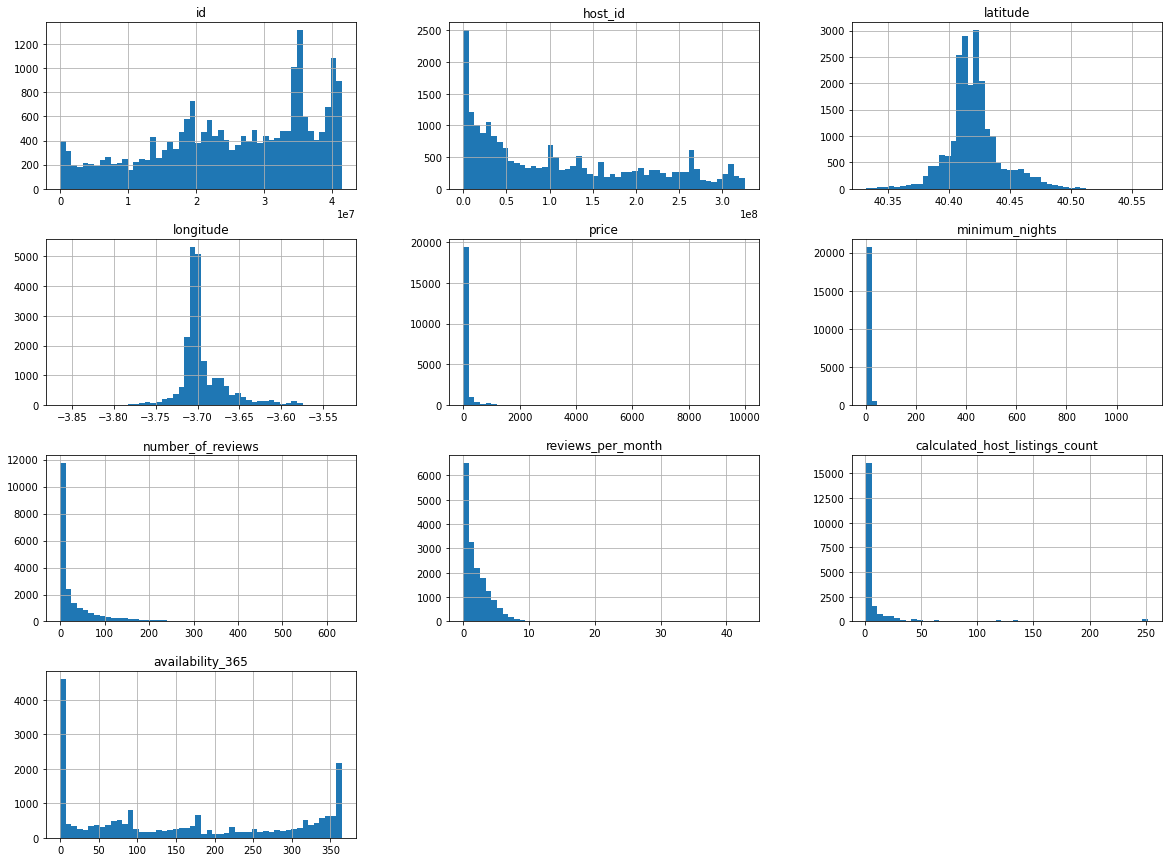

In [9]:
data_model.hist(bins = 50, figsize =(20,15))

#### A simple vista se ve que la distribución que sigue el precio y las noches minimas contienen outliers. Lo trateremos más adelante.
### Ver los valores vacios que hay en cada campo para eliminarlos

In [10]:
data_model.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                           25
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4291
reviews_per_month                 4291
calculated_host_listings_count       0
availability_365                     0
dtype: int64

##### La correlación entre nulos de last_review y reviews_per_month parece significativa ya que tienen los mismos, analizaremos ahora los valores vacios para ver la similitud.

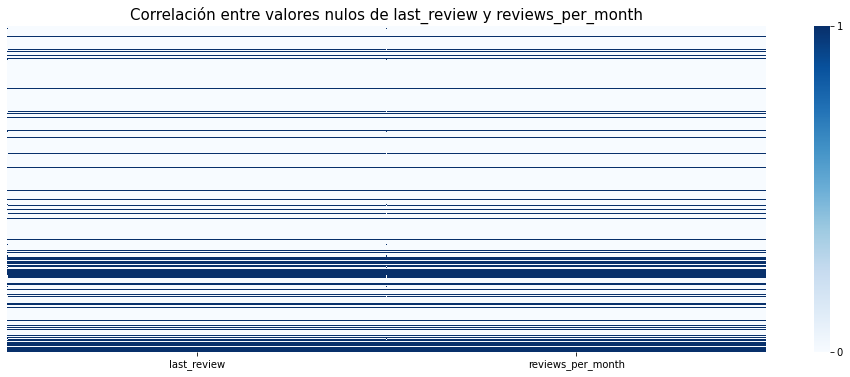

In [11]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Correlación entre valores nulos de last_review y reviews_per_month', fontsize=15)
sns.heatmap(data_model[['last_review','reviews_per_month']].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})
plt.show()

#### Como hemos visto la relación entre los nulos de ambas variables es perfecta, por lo tanto eliminaremos las fechas

In [12]:
data_model.drop('last_review',axis=1,inplace=True)

In [13]:
# Eliminamos los valores nulos
data_model.fillna(0, inplace=True)

### Vamos a tratar las variables de precio y disponibilidad ya que considero que los datos recogidos tienen errores y para el analisis y el modelo puede influir

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

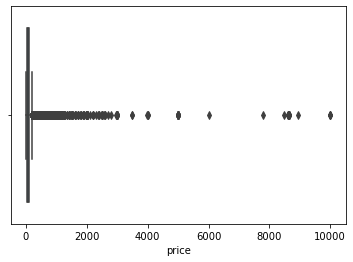

In [14]:
sns.boxplot(data_model['price'])

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

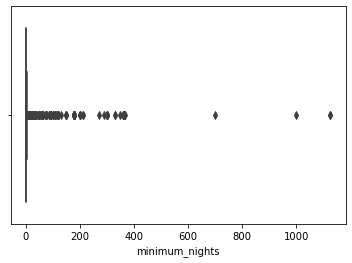

In [15]:
sns.boxplot(data_model['minimum_nights'])

#### Vamos a eliminar los datos que son atipicos con el rango intercuartilico

In [16]:
def clean_outliers(tabla,columna_antigua):
    # Columna antigua hacer referencia a la columna en el dataset y la nueva al nombre de la que no tiene outliers
    
    lista = []
    
    Q1 = np.percentile(tabla[columna_antigua], 25, interpolation = 'midpoint')
    Q3 = np.percentile(tabla[columna_antigua], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    for p in tabla[columna_antigua]:
        if (p <= (Q3+1.5*IQR)):
            lista.append(int(p))
        else:
            lista.append(int(tabla[columna_antigua].mean()))
    return lista

In [17]:
data_model['price_sin_outliers'] = clean_outliers(data_model,'price')
data_model['min_nights_outliers'] = clean_outliers(data_model,'minimum_nights')
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21495 non-null  int64  
 1   name                            21495 non-null  object 
 2   host_id                         21495 non-null  int64  
 3   host_name                       21495 non-null  object 
 4   neighbourhood_group             21495 non-null  object 
 5   neighbourhood                   21495 non-null  object 
 6   latitude                        21495 non-null  float64
 7   longitude                       21495 non-null  float64
 8   room_type                       21495 non-null  object 
 9   price                           21495 non-null  int64  
 10  minimum_nights                  21495 non-null  int64  
 11  number_of_reviews               21495 non-null  int64  
 12  reviews_per_month               

In [18]:
data_model = data_model.drop(['price', 'minimum_nights'],axis = 1)

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_sin_outliers'>

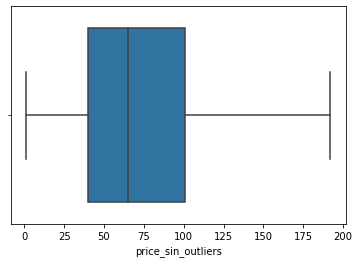

In [19]:
sns.boxplot(data_model['price_sin_outliers'])

#### Hemos eliminado los outliers sustituyendolos por la media

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_nights_outliers'>

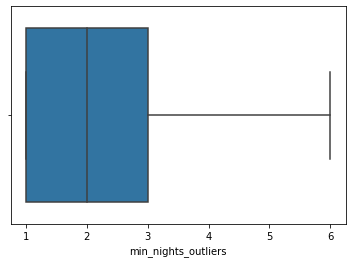

In [20]:
sns.boxplot(data_model['min_nights_outliers'])

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_sin_outliers', ylabel='Density'>

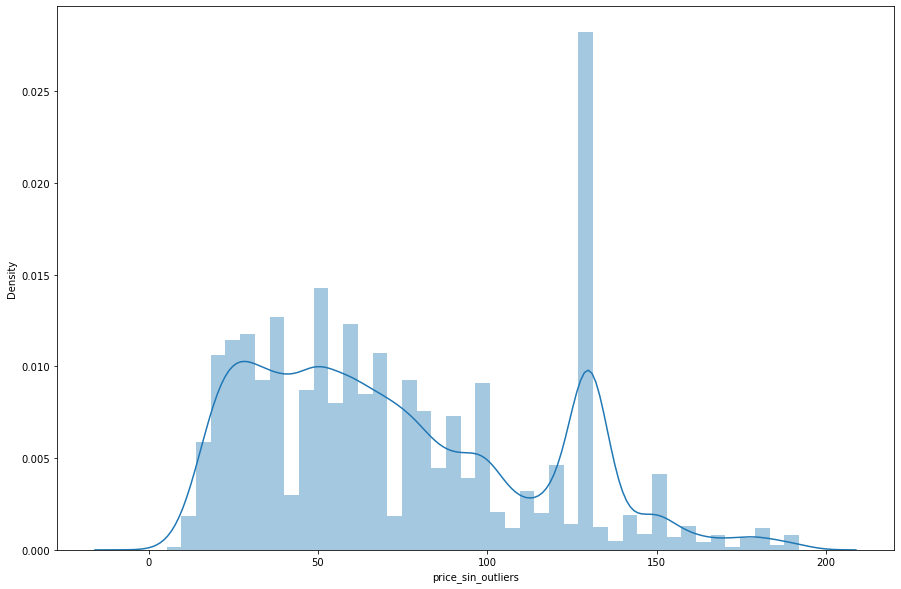

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data_model['price_sin_outliers'])

#### Esto ya tiene mejor pinta, hemos sustituido los valores atípicos por la media, por eso tiene un valor tan elevado. Podría haber sustituido el outlier por el valor justamente antes o despues a eso pero me ha parecido más acertado usar la media.

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_nights_outliers', ylabel='Density'>

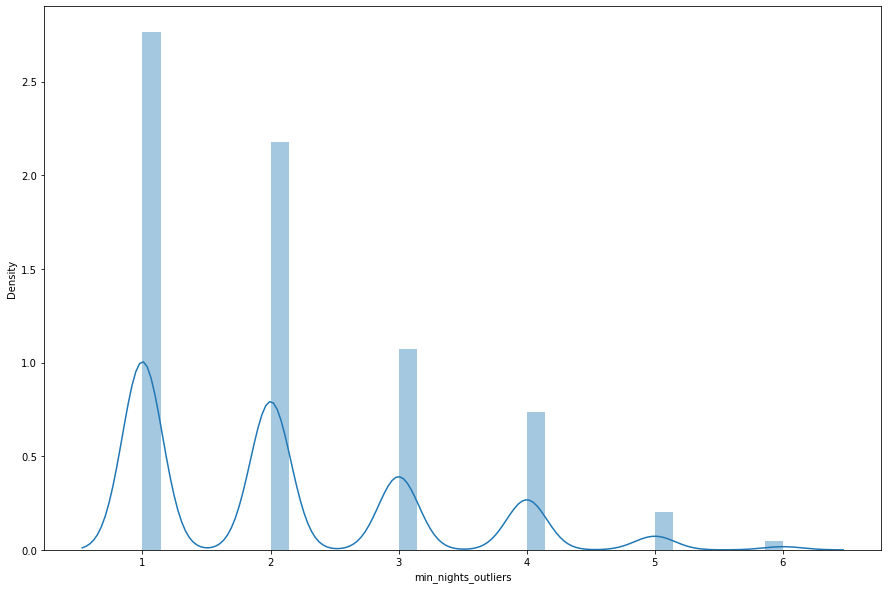

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data_model['min_nights_outliers'])

#### En cuanto a las noches minimas, tiene más sentido que antes teniendo la mayoria en el rango de 1 y 2

In [23]:
data_model['availability_365'].describe()

count    21495.000000
mean       163.023075
std        136.536769
min          0.000000
25%         23.000000
50%        143.000000
75%        312.000000
max        365.000000
Name: availability_365, dtype: float64

#### La variable availability_365 parace esta todo correcto ya que ningun valor supera los 365 dias. Lo que si que haremos será eliminar aquellos que tengan una disponibilidad de 0 dias anuales

In [24]:
data_model = data_model.drop(data_model[data_model['availability_365'] == 0].index)

In [25]:
data_model['availability_365'].describe()

count    17350.000000
mean       201.970086
std        123.408653
min          1.000000
25%         85.000000
50%        193.000000
75%        330.000000
max        365.000000
Name: availability_365, dtype: float64

<AxesSubplot:>

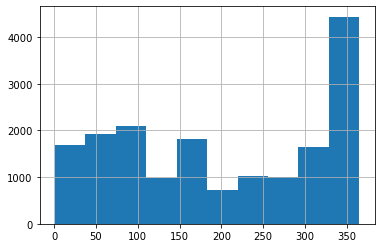

In [26]:
data_model['availability_365'].hist()

### Vemos la distribución de los Airbnb

In [27]:
# Mostramos el top 10
propietario_host = data_model.host_id.value_counts().head(10)
propietario_host

102947901    250
28038703     121
206349691    119
99018982      93
32046323      74
107141654     67
28786243      64
40877988      59
5542111       59
1408525       54
Name: host_id, dtype: int64

In [28]:
# Sacamos los unicos id para los host
len(data_model.host_id.unique())

9233

In [29]:
#Eliminamos duplicados
data_model_unico_host_id = data_model.drop_duplicates(subset=['host_id'])

In [30]:
# Lo ordenamos segun el grupo con mas airbnb por barrio
barrios_grupo = data_model.groupby(by = 'neighbourhood_group').count()['host_id']
df_barrios_grupo = pd.DataFrame(barrios_grupo)
df_barrios_grupo = df_barrios_grupo.sort_values(by=['host_id'], ascending=False)
df_barrios_grupo.reset_index(inplace=True)
df_barrios_grupo

,neighbourhood_group,host_id
0,Centro,8381
1,Salamanca,1096
2,Chamberí,1018
3,Arganzuela,878
4,Tetuán,684
5,Carabanchel,542
6,Puente de Vallecas,528
7,Ciudad Lineal,512
8,Retiro,498
9,Latina,494


#### El Centro tiene una clara predominancia sobre el resto

Text(0.5, 0, 'Barrio')

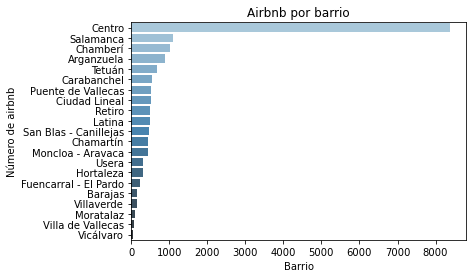

In [31]:
grafico=sns.barplot(y='neighbourhood_group', x='host_id', data=df_barrios_grupo, palette='Blues_d')
grafico.set_title('Airbnb por barrio')
grafico.set_ylabel('Número de airbnb')
grafico.set_xlabel('Barrio')

#### Como vemos, la distribución indica que la mayoria se encuentra en el centro con una gran distancia frente al segundo situado en el barrio Salamanca. Esto es nivel barrio, ahora entraremos más a fondo viendo la distribución que hay en cada uno de estos

In [32]:
for barrio in data_model['neighbourhood_group'].unique():
    barrio_distribucion = data_model[data_model['neighbourhood_group']==barrio]['neighbourhood'].value_counts(ascending=False)[:3]
    print('Barrio: {}\n{} \n'.format(barrio,barrio_distribucion))

Barrio: Chamartín
Prosperidad       121
Hispanoamérica     95
Ciudad Jardín      62
Name: neighbourhood, dtype: int64 

Barrio: Latina
Puerta del Angel    239
Aluche               79
Lucero               67
Name: neighbourhood, dtype: int64 

Barrio: Arganzuela
Palos de Moguer    283
Delicias           161
Acacias            135
Name: neighbourhood, dtype: int64 

Barrio: Centro
Embajadores    2250
Universidad    1749
Palacio        1286
Name: neighbourhood, dtype: int64 

Barrio: Fuencarral - El Pardo
Peñagrande    61
Valverde      59
Pilar         48
Name: neighbourhood, dtype: int64 

Barrio: Tetuán
Cuatro Caminos    153
Bellas Vistas     137
Berruguete        121
Name: neighbourhood, dtype: int64 

Barrio: Ciudad Lineal
Ventas          143
Quintana         98
Pueblo Nuevo     94
Name: neighbourhood, dtype: int64 

Barrio: Chamberí
Trafalgar     309
Gaztambide    179
Almagro       168
Name: neighbourhood, dtype: int64 

Barrio: Villaverde
Los Rosales    46
San Andrés     42
Los Ange

#### Con esta tabla podemos visualizar que zonas dentro de los barrio tienen mayor concentración de airbnb. El centro al tener una mayor concentración supera con creces al resto de barrios. Embajadores lidera la zona con más airbnb. El barrio de Salamanca siendo el segundo con mayor proporción de airbnb. 

#### Ahora vamos a ver la distribución de las habitaciones y el precio de cada una

In [33]:
#Existen 4 tipos de habitaciones diferentes, vamos a ver cual es la más cara y en que zona se encuentra
data_model.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [34]:
habitaciones_barrio_grupo = data_model.groupby(['room_type','neighbourhood_group'],sort=False)['id'].agg([('count','count')]).sort_values(by=['room_type','count'],ascending=[True,False])
habitaciones_barrio_grupo = pd.DataFrame(habitaciones_barrio_grupo)
habitaciones_barrio_grupo.reset_index(inplace=True)
habitaciones_barrio_grupo

,room_type,neighbourhood_group,count
0,Entire home/apt,Centro,6380
1,Entire home/apt,Salamanca,799
2,Entire home/apt,Chamberí,634
3,Entire home/apt,Arganzuela,511
4,Entire home/apt,Tetuán,412
...,...,...,...
70,Shared room,Villa de Vallecas,3
71,Shared room,Moncloa - Aravaca,3
72,Shared room,Barajas,2
73,Shared room,Moratalaz,1


Text(0.5, 1.0, 'Distribución por barrio de las habitaciones')

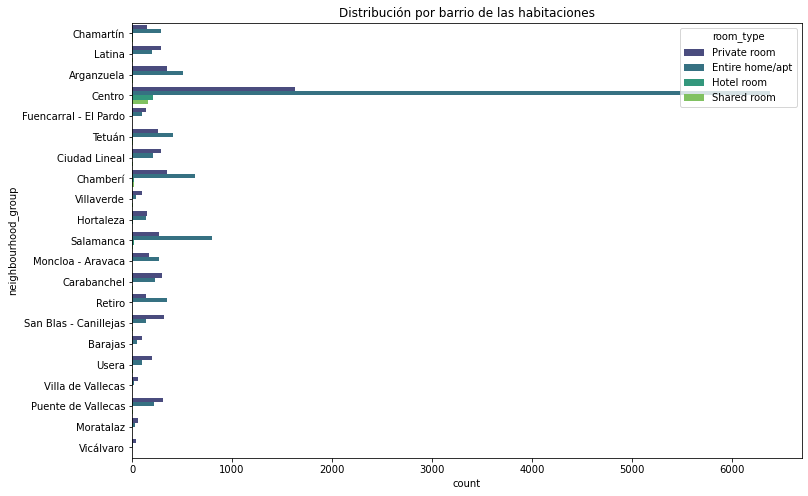

In [35]:
# Distribución por barrio de las habitaciones
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood_group',data=data_model,hue='room_type',palette='viridis')
plt.title('Distribución por barrio de las habitaciones')

#### Vamos a ir un nivel más abajo para hacer una analisis más en detalle

In [36]:
habitaciones_barrio = data_model.groupby(['room_type','neighbourhood'],sort=False)['id'].agg([('count','count')]).sort_values(by=['room_type','count'],ascending=[True,False])
habitaciones_barrio = pd.DataFrame(habitaciones_barrio)
habitaciones_barrio.reset_index(inplace=True)
habitaciones_barrio

,room_type,neighbourhood,count
0,Entire home/apt,Embajadores,1698
1,Entire home/apt,Universidad,1299
2,Entire home/apt,Palacio,986
3,Entire home/apt,Sol,965
4,Entire home/apt,Justicia,721
...,...,...,...
339,Shared room,Aravaca,1
340,Shared room,Castellana,1
341,Shared room,Puerta del Angel,1
342,Shared room,Timón,1


In [37]:
# Sacamos el top15 
habitaciones_barrio_15 = habitaciones_barrio.groupby(['room_type']).apply(lambda x: x.nlargest(15,'count'))
habitaciones_barrio_15 = pd.DataFrame(habitaciones_barrio_15)
habitaciones_barrio_15

room_type     neighbourhood  count
room_type                                                    
Entire home/apt 0    Entire home/apt       Embajadores   1698
                1    Entire home/apt       Universidad   1299
                2    Entire home/apt           Palacio    986
                3    Entire home/apt               Sol    965
                4    Entire home/apt          Justicia    721
                5    Entire home/apt            Cortes    711
                6    Entire home/apt         Trafalgar    224
                7    Entire home/apt              Goya    202
                8    Entire home/apt         Recoletos    197
                9    Entire home/apt   Palos de Moguer    192
                10   Entire home/apt         Argüelles    166
                11   Entire home/apt        Guindalera    125
                12   Entire home/apt  Puerta del Angel    118
                13   Entire home/apt           Almagro    112
                14   Entire home/apt        Castellana    110
Hotel room      124       Hotel room       Universidad     73
                125       Hotel room       Embajadores     51
                126       Hotel room               Sol     43
                127       Hotel room            Cortes     24
                128       Hotel room          Justicia     12
                129       Hotel room           Palacio     11
                130       Hotel room         Recoletos      8
                131       Hotel room        Rios Rosas      8
                132       Hotel room             Lista      7
                133       Hotel room         Trafalgar      5
                134       Hotel room          Canillas      5
                135       Hotel room   Palos de Moguer      5
                136       Hotel room       Prosperidad      4
                137       Hotel room        Castellana      3
                138       Hotel room       Castillejos      3
Private room    158     Private room       Embajadores    466
                159     Private room       Universidad    311
                160     Private room           Palacio    280
                161     Private room          Justicia    232
                162     Private room               Sol    182
                163     Private room            Cortes    158
                164     Private room  Puerta del Angel    119
                165     Private room            Ventas    100
                166     Private room        Gaztambide     92
                167     Private room         San Diego     90
                168     Private room   Palos de Moguer     86
                169     Private room          Numancia     83
                170     Private room          Delicias     83
                171     Private room             Rosas     80
                172     Private room         Trafalgar     74
Shared room     284      Shared room       Universidad     66
                285      Shared room       Embajadores     35
                286      Shared room               Sol     26
                287      Shared room          Justicia     20
                288      Shared room           Almagro     10
                289      Shared room           Palacio      9
                290      Shared room          Delicias      6
                291      Shared room       Los Rosales      6
                292      Shared room         Trafalgar      6
                293      Shared room        Gaztambide      5
                294      Shared room             Rosas      4
                295      Shared room        Pradolongo      4
                296      Shared room         San Diego      3
                297      Shared room     Valdeacederas      3
                298      Shared room        San Fermín      3

#### Al jugar con el valor absoluto siempre predominará el centro ya que tiene más airbnb, por lo tanto habría que obtener el % de cada tipo de airbnb para saber que % predomina en cada barrio. Esto no quita que se vea claramente que predomina el apartamento entero frente al resto

### Vamos el precio en función del grupo del barrio, el barrio y el tipo de habitación

In [38]:
#Precio medio por habitacion y barrio
# Si disponemos del numero medio de personas que se pueden  meter, podemos obtener el precio medio por persona para el apartamento
precio_medio_barrio_general = data_model.groupby(['neighbourhood_group'])['price_sin_outliers'].mean().round(2).sort_values(ascending=False)
precio_medio_barrio_general = pd.DataFrame(precio_medio_barrio_general)
precio_medio_barrio_general

,price_sin_outliers
neighbourhood_group,
Salamanca,89.84
Centro,82.12
Moncloa - Aravaca,82.10
San Blas - Canillejas,80.90
Retiro,80.84
Chamartín,80.39
Chamberí,77.46
Hortaleza,76.75
Vicálvaro,75.79


#### Vemos como el barrio más caro es Salamanca seguido del Centro y el más barato Villaverde. Vamos a ver la distribución de los precios por barrio

Text(0.5, 0, 'Barrio')

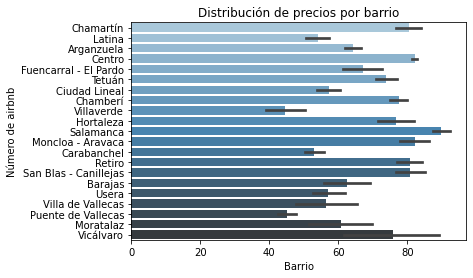

In [39]:
grafico =sns.barplot(y='neighbourhood_group', x='price_sin_outliers', data=data_model, palette='Blues_d')
grafico.set_title('Distribución de precios por barrio')
grafico.set_ylabel('Número de airbnb')
grafico.set_xlabel('Barrio')

Text(0.5, 1.0, 'Distribución de precios por barrio')

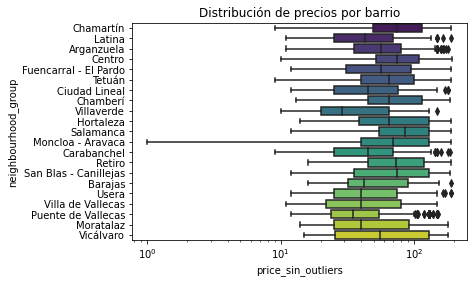

In [40]:
g = sns.boxplot(x='price_sin_outliers',y='neighbourhood_group',data=data_model,palette='viridis')
g.set(xscale='log')
plt.title('Distribución de precios por barrio')

Text(0.5, 1.0, 'Distribución de precio por barrio')

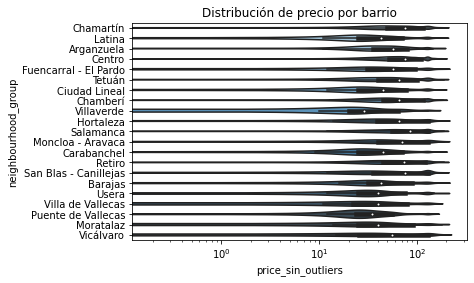

In [41]:
g = sns.violinplot(x='price_sin_outliers',y='neighbourhood_group',data=data_model,palette='Blues_d')
g.set(xscale='log')
plt.title('Distribución de precio por barrio')

In [42]:
#Precio medio por habitacion y barrio
# Si disponemos del numero medio de personas que pueden ocupar el Airbnb, podemos obtener el precio medio por persona para el apartamento
precio_medio_habitacion_barrio = data_model.groupby(['neighbourhood_group','room_type'])['price_sin_outliers'].mean().round(2)
precio_medio_habitacion_barrio = pd.DataFrame(precio_medio_habitacion_barrio)
precio_medio_habitacion_barrio

price_sin_outliers
neighbourhood_group room_type                          
Arganzuela          Entire home/apt               79.15
                    Hotel room                    95.14
                    Private room                  42.48
                    Shared room                   45.20
Barajas             Entire home/apt               87.71
...                                                 ...
Villa de Vallecas   Shared room                   46.00
Villaverde          Entire home/apt               75.57
                    Hotel room                   130.00
                    Private room                  34.15
                    Shared room                   28.29

[75 rows x 1 columns]

#### Ahora veremos la media del precio pero distribuido por barrios

In [43]:
precio_medio_barrio_int = data_model.groupby(['neighbourhood_group','neighbourhood'],sort=False)['price_sin_outliers'].agg([('price_avg','mean')]).sort_values(by=['neighbourhood_group','price_avg'],ascending=[True,False])
precio_medio_barrio_int.reset_index()

,neighbourhood_group,neighbourhood,price_avg
0,Arganzuela,Atocha,83.764706
1,Arganzuela,Palos de Moguer,72.063604
2,Arganzuela,Imperial,70.719626
3,Arganzuela,Acacias,62.837037
4,Arganzuela,Delicias,57.335404
...,...,...,...
122,Villaverde,Butarque,59.111111
123,Villaverde,San Andrés,50.357143
124,Villaverde,Los Angeles,45.687500
125,Villaverde,Los Rosales,39.760870


#### Vamos a ver la disponibilidad de cada airbnb por barrio

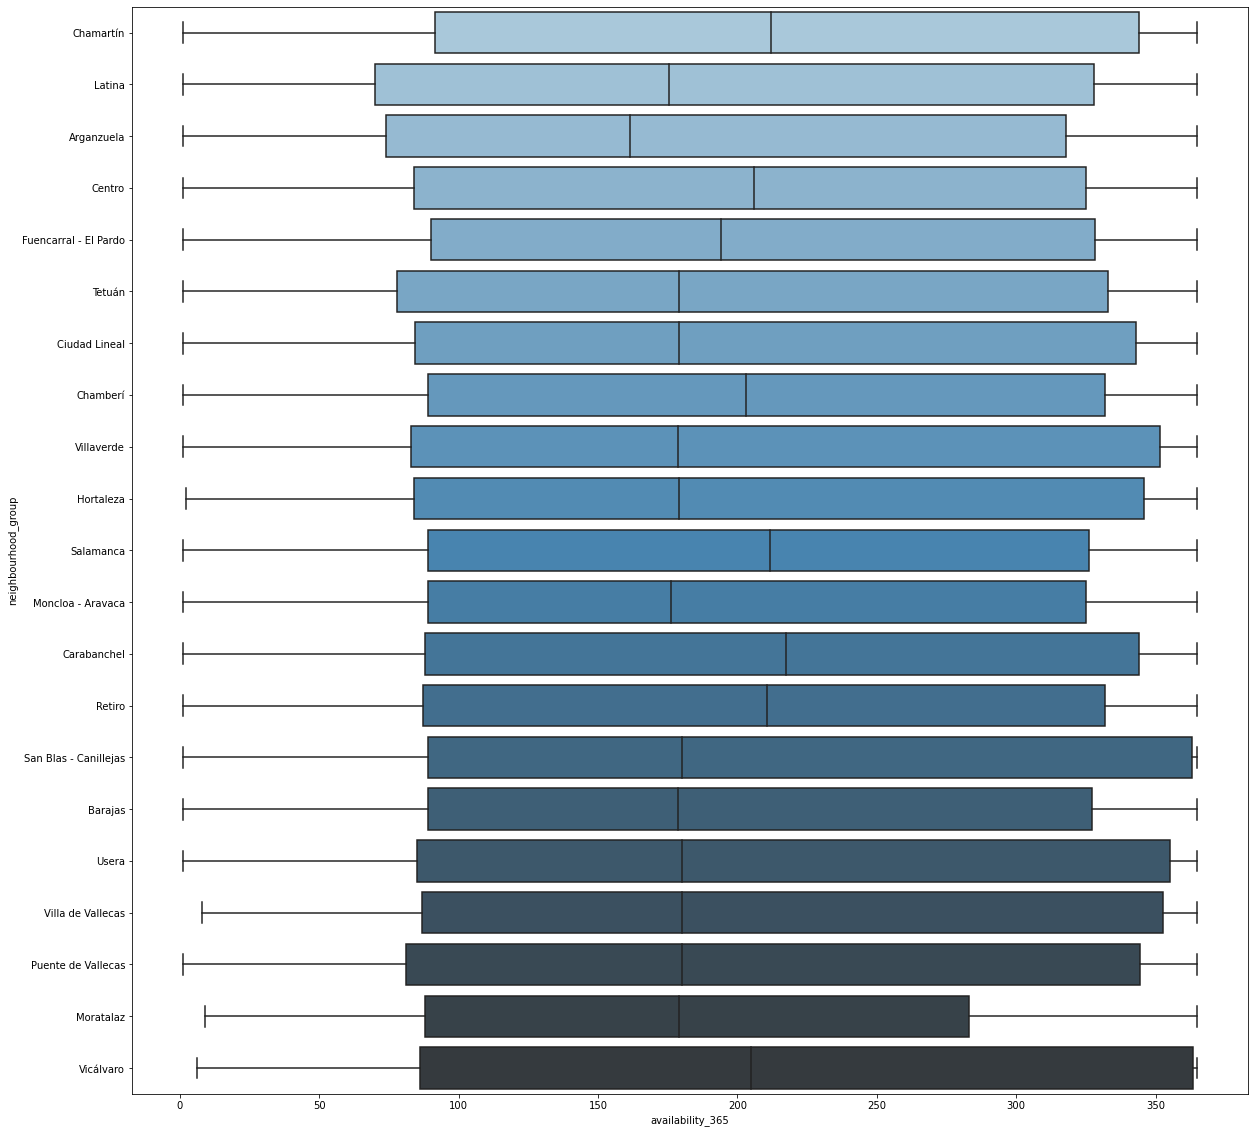

In [44]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=data_model, y='neighbourhood_group',x='availability_365',palette='Blues_d')

#### Ahora gracias a la latitud y longitud podemos pintar en un mapa donde se encuentra cada barrio

C:\Users\rbarambi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


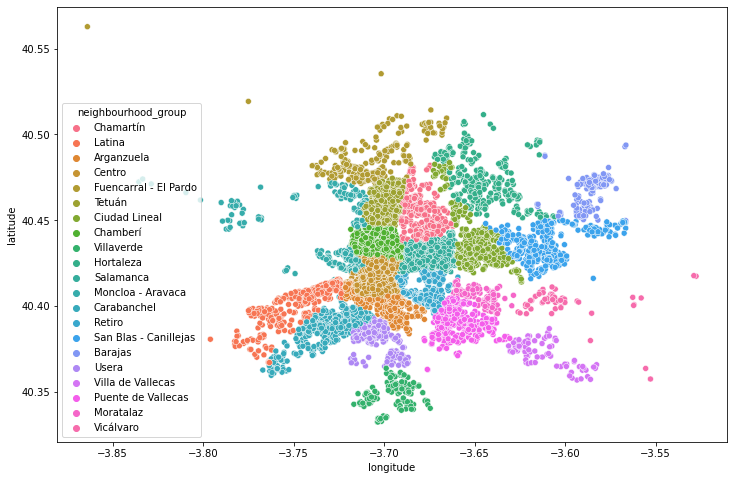

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(data_model.longitude,data_model.latitude,hue=data_model.neighbourhood_group)
plt.ioff()

### Procedemos hacer una analisis de sentimiento de las reseñas para valorar cual tiene mejor y peor puntuacion

#### Lo que vamos hacer ahora es usar los comentarios de las opiniones de la gente para poder valorar los airbnb dandole un sentimiento a cada uno y poder asignarle un valor como positivo, negativo o neutro

In [46]:
reviews = pd.read_csv(path + '\\' + 'reviews.csv')

In [47]:
reviews.shape

(812726, 6)

In [48]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         375
dtype: int64

In [49]:
reviews = reviews.dropna()

In [50]:
reviews.shape

(812350, 6)

In [51]:
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [52]:
# Reduzco los registros del csv ya que mi ordenador no puede procesar tanto
cut_reviews = reviews[:500]

In [53]:
cut_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...
...,...,...,...,...,...,...
495,30959,47092066,2015-09-15,22954260,Simon,This is not a review for the Beautiful Loft ap...
496,30959,65558249,2016-03-15,4960577,Florencia,Angela fue una anfitriona excelente.El apartam...
497,30959,146889869,2017-04-24,21826849,Lykke,A very nice an cozy apartment within walking d...
498,30959,148827845,2017-05-01,124063965,Maria Jesús,Sitio perfecto y estancia inmejorable. Muchas ...


#### Detectamos el idioma del comentario

In [54]:
idioma = []

for i in range(0, len(cut_reviews)):
    try: 
        review_all = cut_reviews['comments'][i]
        idioma_detect = detect(review_all)
    except:
        idioma_detect = 'Error'
    idioma.append(idioma_detect)

In [55]:
# idioma = []

# for i in range(0, len(reviews)):
#     try: 
#         review_all = reviews['comments'][i]
#         idioma_detect = detect(review_all)
#     except:
#         idioma_detect = 'Error'
#     idioma.append(idioma_detect)

In [56]:
len(idioma)

500

In [57]:
cut_reviews['idioma'] = idioma

<ipython-input-57-a30e81e9a37c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_reviews['idioma'] = idioma


In [58]:
cut_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     500 non-null    int64 
 1   id             500 non-null    int64 
 2   date           500 non-null    object
 3   reviewer_id    500 non-null    int64 
 4   reviewer_name  500 non-null    object
 5   comments       500 non-null    object
 6   idioma         500 non-null    object
dtypes: int64(3), object(4)
memory usage: 51.2+ KB


#### Vemos que idiomas encontramos en los datos y los traducimos al ingles para poder preprocesarlos

In [59]:
cut_reviews['idioma'].unique()

array(['en', 'fr', 'es', 'pt', 'de', 'nl', 'ko', 'it', 'zh-cn', 'ro',
       'ja', 'ru'], dtype=object)

In [60]:
corpus_all = []

for i in range(0, len(cut_reviews)):
    corpus = cut_reviews.loc[i,"comments"]
    translator = Translator()
    translated = translator.translate(corpus, dest = 'en')
    corpus_all.append(translated.text)

In [62]:
cut_reviews['comments_en'] = corpus_all

<ipython-input-62-bd8669ab1cb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_reviews['comments_en'] = corpus_all


#### Limpiamos los datos eliminando caracteres pasandolos a minusculas eliminando stopwords y tokenizandolos

In [63]:
corpus_token = []
for i in range(0, len(cut_reviews)):
    corpus = re.sub('[^a-zA-Z]',' ', cut_reviews['comments_en'][i])
    corpus = corpus.lower().split()
    ps = PorterStemmer()
    corpus = [ps.stem(word) for word in corpus if not word in set(stopwords.words('english'))]
    corpus = ' '.join(corpus)
    corpus_token.append(corpus)

#### Asigamos un numero para cada sentimiento del comentario

In [64]:
sentiment = []
for i in range(0, len(corpus_token)):
    sent = TextBlob(corpus_token[i])
    sent = sent.sentiment.polarity
    sentiment.append(sent)

In [65]:
cut_reviews['sentiment'] = sentiment

<ipython-input-65-17d4a33d69bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_reviews['sentiment'] = sentiment


In [66]:
cut_reviews['sentiment'].describe()

count    500.000000
mean       0.372085
std        0.243879
min       -0.500000
25%        0.218342
50%        0.355556
75%        0.517857
max        1.000000
Name: sentiment, dtype: float64

#### En general parece que los comentarios son ligeramente positivos ya que la media se encuentra por encima del 0

#### Procedemos a extraer los id unicos y asignar el valor del sentimiento global a cada uno

In [67]:
cut_reviews['listing_id'].unique()

array([ 6369, 21853, 24805, 24836, 26825, 30320, 30959], dtype=int64)

In [68]:
valoracion_airbnb = cut_reviews.groupby(by = 'listing_id').mean()['sentiment']
valoracion_airbnb = pd.DataFrame(valoracion_airbnb)
valoracion_airbnb = valoracion_airbnb.sort_values(by=['sentiment'], ascending=False)
valoracion_airbnb.reset_index(inplace=True)
valoracion_airbnb

,listing_id,sentiment
0,24805,0.557407
1,24836,0.403357
2,21853,0.395656
3,6369,0.382912
4,30320,0.361187
5,26825,0.349286
6,30959,0.331944


Text(0.5, 0, 'listing_id')

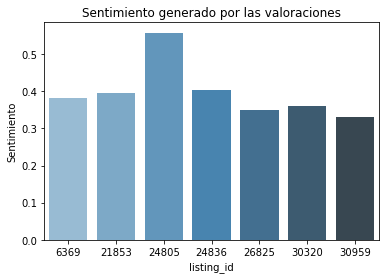

In [69]:
grafico_sentimientos =sns.barplot(y='sentiment', x='listing_id', data=valoracion_airbnb, palette='Blues_d')
grafico_sentimientos.set_title('Sentimiento generado por las valoraciones')
grafico_sentimientos.set_ylabel('Sentimiento')
grafico_sentimientos.set_xlabel('listing_id')

#### En terminos generales vemos que el airbnb con un id 24805 tiene un sentimiento en las reseñas mejor frente a 30959 que es el peor pero tampoco difiere mucho, en general los comentarios parece ser positivos

#### Tokenizamod las palabras para poder extraer aquellas que más se repiten

In [70]:
corpus_token_join = ' '.join(corpus_token)

In [71]:
tokens = word_tokenize(corpus_token_join, 'english')

In [72]:
freq = nltk.FreqDist(tokens)

In [73]:
for key, val in freq.items():
    print(str(key) + ':' + str(val))

simon:38
arturo:78
ultim:1
locat:254
madrid:219
step:12
metro:107
bu:21
line:11
everywher:9
want:33
visit:38
accomod:7
clean:190
well:111
appoint:6
fantast:20
view:20
skylin:1
felt:22
like:52
spa:1
walk:82
flat:32
greet:9
warmli:3
offer:17
lot:21
inform:16
get:48
run:7
short:20
stay:269
wish:11
could:49
longer:5
highli:68
recommend:166
neighborhood:62
kristi:1
origin:2
plan:11
week:13
chang:9
open:17
work:24
schedul:4
friendli:71
help:126
throughout:4
ten:6
day:56
room:140
kept:8
amaz:25
perfect:84
go:47
travel:24
around:27
europ:4
anoth:9
four:8
month:5
joke:1
set:10
standard:2
high:7
doubt:9
abl:17
better:28
true:3
thank:77
much:47
graciou:3
respect:5
space:25
would:99
anyon:16
quit:23
place:195
great:213
wonder:44
honest:2
atmospher:6
outstand:4
host:172
time:104
cosi:7
apart:391
terrass:4
realli:60
nice:135
enjoy:45
bath:8
love:55
terrac:34
especi:16
given:9
easi:48
access:34
airport:32
look:27
forward:4
return:22
kurt:1
polit:4
provid:30
pleasant:32
conveni:41
denni:1
airbnb:28
ex

sympathet:1
commit:1
design:1
noch:1
vice:1
budget:1
ratifi:1
intend:1
held:1
feather:1
alhomada:1
preserv:1
sincer:1
effort:1
face:2
leas:2
grace:1
profession:13
leisur:2
h:1
decentr:1
lead:1
breweri:1
valid:1
lind:1
page:1
goal:1
zone:1
insecur:1
match:2
support:1
drop:3
circular:1
daili:1
oven:1
rememb:1
halfway:1
predisposit:1
okay:1
flash:1
hr:2
bear:1
reina:2
sofia:2
stroll:1
thirsti:1
vino:1
tinto:1
dominguez:1
paseo:1
delicia:1
autom:1
freedom:1
household:1
behavior:1
correct:2
thousand:1
fab:1
mexican:1
photograph:1
sooner:1
aparta:1
observ:1
ethic:1
preciou:1
guidelin:1
mobil:1
birthday:1
downstair:1
pr:1
vate:1
concert:1
caja:1
gica:1
honestli:1
dont:1
visitint:1
immedi:4
solo:3
link:1
follow:1
els:3
women:1
plen:1
centro:1
cooper:1
basic:4
earlier:4
airnb:1
iustina:1
aircondit:1
notic:1
loud:10
initi:3
shadi:1
walkabl:2
max:1
cram:1
rohit:1
staff:3
imagin:5
justic:1
featur:1
sound:2
count:1
couch:2
asleep:2
wrong:2
discov:1
luckili:1
pan:2
america:1
hostel:2
paper:4
whether

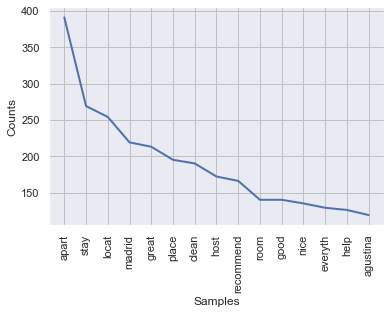

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [74]:
#Pintamos las 15 palabras mas repetidas
sns.set()
freq.plot(15, cumulative = False)

#### Podemos ver como destaca great, clean, good y nice, palabras que reafirman el sentimiento que hemos obtenido antes. Para hacerlo mas completo podríamos meter un NER para obtener la etiqueta de cada palabra y eliminar las que no nos interese

### Intentamos obterner relación de las variables con la que toca predecir

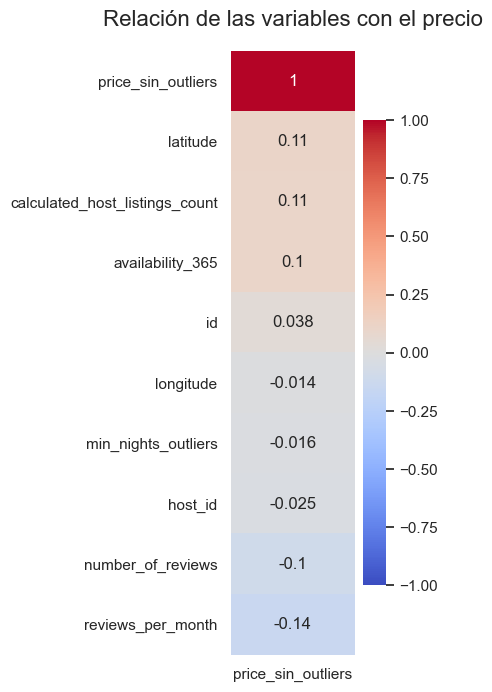

In [75]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (data_model.corr()[['price_sin_outliers']].sort_values (by = 'price_sin_outliers', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title ('Relación de las variables con el precio', fontdict = {'fontsize':16} , pad = 18);

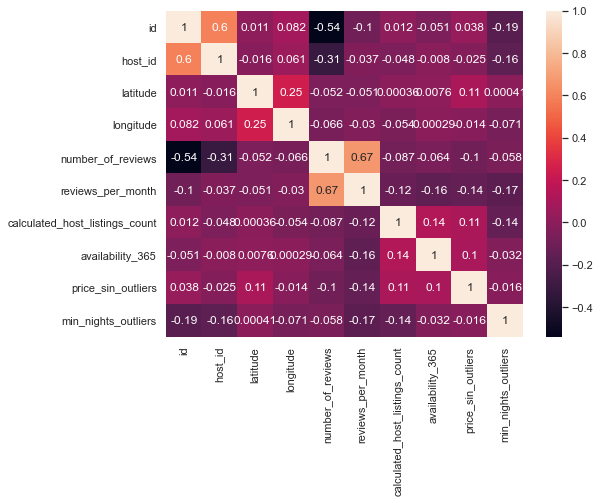

In [76]:
corr_data_model = data_model.corr ()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_model, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='host_id', ylabel='id'>

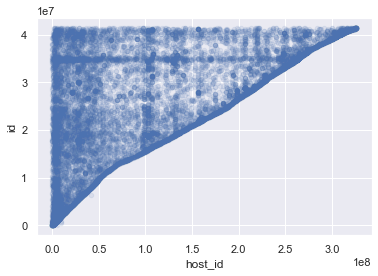

In [77]:
data_model.plot(kind='scatter', x= 'host_id', y = 'id', alpha = 0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='number_of_reviews', ylabel='reviews_per_month'>

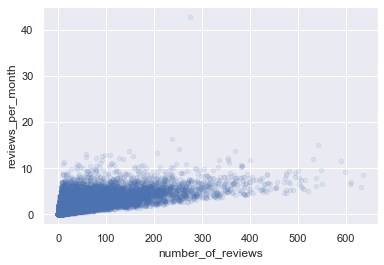

In [78]:
data_model.plot(kind='scatter', x= 'number_of_reviews', y = 'reviews_per_month', alpha = 0.1)

#### A priori no vemos ninguna relación fuerte con el precio, pero si vemos relaciones positivas entren el host_id y el id y number of reviews y reviews per month por lo tanto eliminaremos 2 de las 4 variables ya que no nos harán falta. 

#### Hemos visto las variables que tiene el dataset pero necesitamos hacer una limpieza de aquellas que no nos sirvan para el modelo como puede ser el id, el host_id, host_name ya que consideron que no tendran ningun impacto sobre el precio que podamos obtener.

In [79]:
data_model_clean = data_model.drop(['name','id', 'host_id','host_name'],axis = 1)

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'price_sin_outliers'}>,
        <AxesSubplot:title={'center':'min_nights_outliers'}>,
        <AxesSubplot:>]], dtype=object)

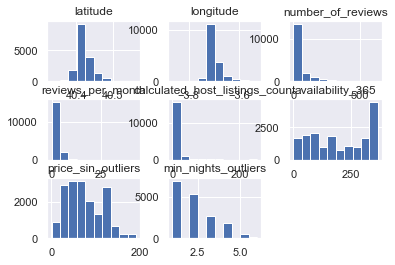

In [80]:
data_model_clean.hist()

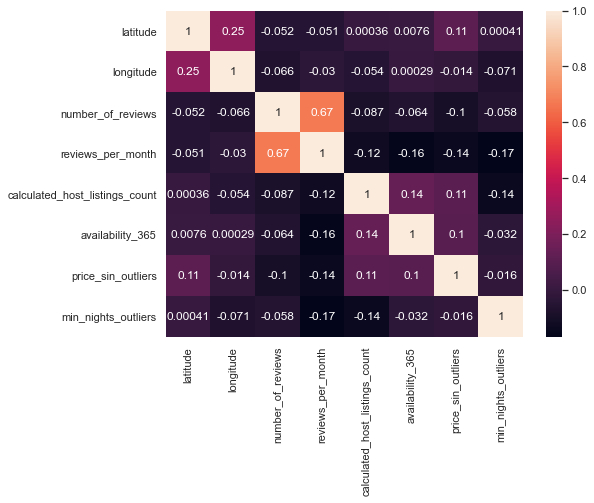

In [81]:
corr_data_model = data_model_clean.corr ()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_model, annot=True)
plt.show()

In [82]:
X = data_model_clean.drop(['price_sin_outliers'],axis = 1)
y = data_model_clean['price_sin_outliers']

#### Por otro lado, pasaremos las variable categoricas a numéricas

In [83]:
X = pd.concat([X, pd.get_dummies(X['room_type'], prefix='room_type')],axis=1)
X = pd.concat([X, pd.get_dummies(X['neighbourhood_group'], prefix='neighbourhood_group')],axis=1)
X = pd.concat([X, pd.get_dummies(X['neighbourhood'], prefix='neighbourhood')],axis=1)
X = X.drop(['room_type','neighbourhood_group', 'neighbourhood'],axis=1)

#### Dividimos entre train y test y escalamos

In [84]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [85]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Hacemos modelo de prediccion, empezaremos con una regresion logistica ya que es mas sencillo de explicar si fuese necesario

In [86]:
def creacion_modelo(tipo_modelo, variables_x, variable_y):
    X_train, X_test, y_train, y_test =  train_test_split(variables_x,variable_y,test_size = 0.2, random_state= 0)

    reg=tipo_modelo()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)

    from sklearn.metrics import r2_score, mean_squared_error
    print("R2 score: ",r2_score(y_test,y_pred)*100)
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

    #Error
    error_diff = pd.DataFrame({'Valor actual': np.array(y_test).flatten(), 'Valor predicho': y_pred.flatten()})
    print(error_diff.head(5))

    #Ver el error
    df1 = error_diff.head(25)
    df1.plot(kind='bar',figsize=(15,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    return 

R2 score:  33.68067551542359
RMSE:  32.81906668455779
   Valor actual  Valor predicho
0           150       76.964942
1            97       80.016186
2            49      103.301545
3            70       65.076472
4           130      119.731730


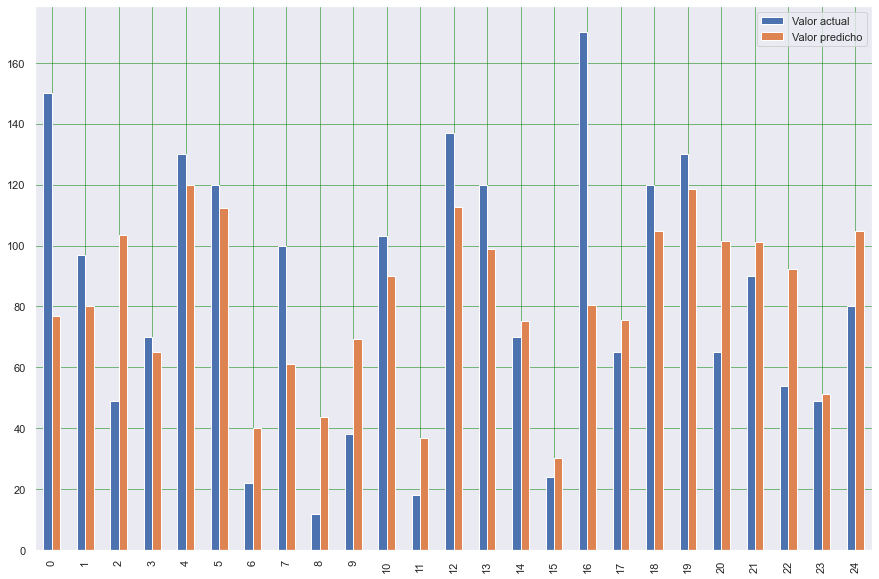

In [87]:
creacion_modelo(LinearRegression, X, y)

#### El modelo que hemos obtenido es malo, esto se debe a un subajuste. Tiene un acierto de un 33,68% y un error medio de 32,81 en el precio. Para poder solucionar esta casuistica debemos de tener en cuenta varios factores. El primero es que las variables que tenemos no aportan suficiente explicabilidad para poder realizar correctamente el modelo. La segunda es quiza que el modelo no sea lo suficientemente potente, por lo tanto vamos a usar alguna técnica más avanzada.

R2 score:  54.26188957248451
RMSE:  27.2549436665191
   Valor actual  Valor predicho
0           150          132.30
1            97           90.21
2            49           82.38
3            70           66.64
4           130          128.88


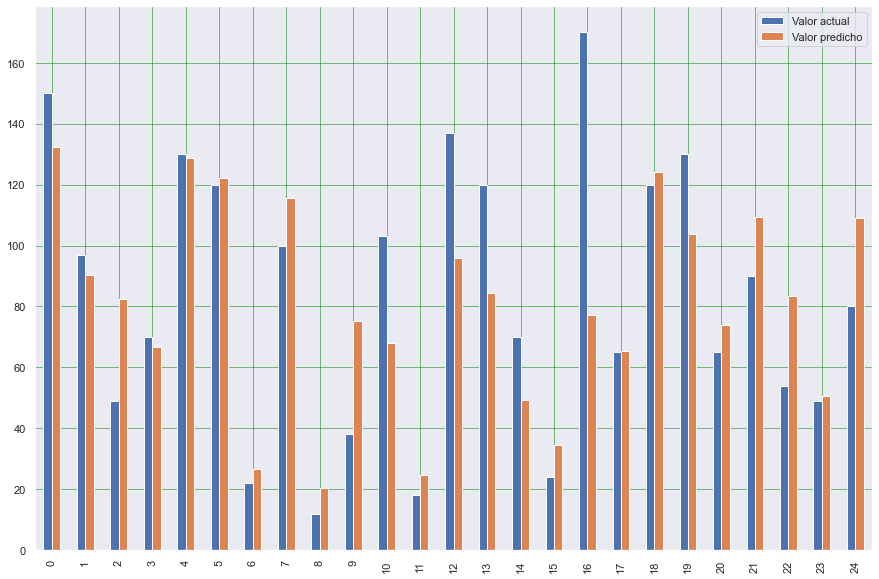

In [88]:
creacion_modelo(RandomForestRegressor, X,y)

R2 score:  52.499890207769795
RMSE:  27.774962809862103
   Valor actual  Valor predicho
0           150      121.198654
1            97      104.482635
2            49       80.982948
3            70       73.560333
4           130      128.657608


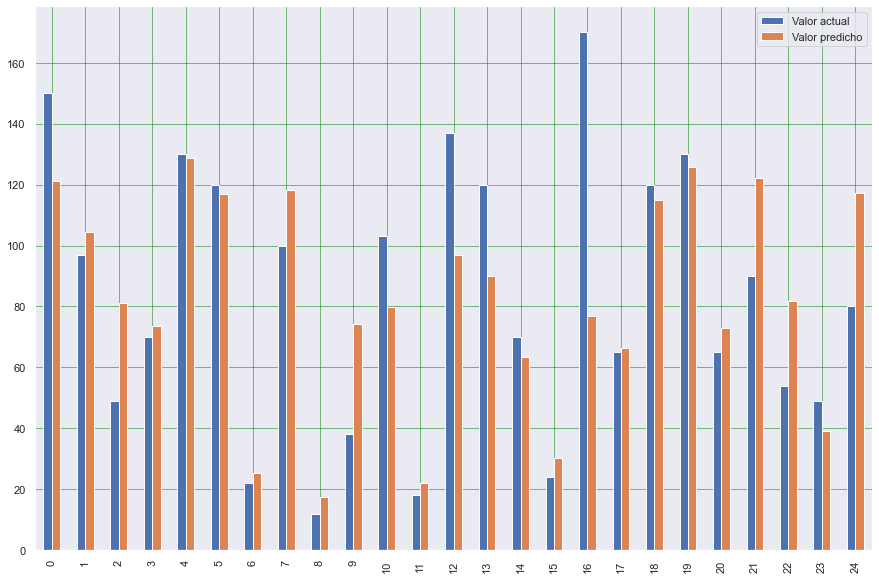

In [89]:
creacion_modelo(xgb.XGBRegressor, X, y)

## Conclusiones

#### -	A priori el precio y las noches mínimas tienen outliers que dificultan el estudio y el modelo que se lleva a cabo, por lo tanto, necesitan un tratamiento diferente al resto de variables. Lo haremos al principio ya que considero que son fallos de recopilación de datos.
#### -	Existen valores nulos que eliminaremos para un correcto análisis.
#### -	Nos encontramos con variables categóricas que deberemos convertir a dicotómicas para poder hacer el modelo.
#### -	Podemos ver como el Centro tiene una mayor concentración de Airbnb con respecto a otros barrios, seguido de lejos por el barrio Salamanca.
#### -	Dentro de cada barrio, podemos especificar que en el Centro, Embajadores, Universidad y Palacio ocupan las tres primeras posiciones con 2250, 1749 y 1286 Airbnb respectivamente seguido muy de lejos por Trafalgar dentro del barrio Chamberi con 382 Airbnb
#### -	Dentro del cada barrio, podemos determinar que Entire home/apt predomina sobre el resto, donde mas se nota es en el Centro con un porcentaje del 76,12% y dentro de este, Embajadores con casi un 27% del total.
#### -	En cuanto al precio, el mayor se ve en el barrio de Salamanca con un promedio de 89,84 por Airbnb seguido muy de cerca por el Centro con 82,12 y Moncloa con 82,10.
#### -	En relación a las noches mínimas, la mayoría se encuentra en el rango de 1 o 2 noches.
#### -  Sobre los comentarios, podemos decir que la mayoría son positivos (cogiendo una muestra de 500) 
#### -	Por último, en los modelos nos encontramos con que las variables no son suficientemente explicativas (no supera ninguna el 0,3 en la matriz de correlación como para aceptarla) y por lo tanto el R2 del modelo es bastante bajo para aceptar que se trata de una buena predicción. En un principio habia quitado las variables de longitud, latitud y neighbourhood ya que me parecia información redundante, pero he visto que mejoran el modelo.  

